
**Regression** in machine learning is a method for predicting a **continuous numeric value** based on input data.
Think of it as drawing the best possible curve (or line) through data points so that you can estimate unknown values.

Example:

* If you have data about house size, location, and number of bedrooms, **regression** can predict the price of a house.
* If you have data on a car’s engine size, weight, and fuel type, regression can predict fuel efficiency.

**Key points about regression**:

* The output is **numeric** (not a category like in classification).
* The model learns the relationship between **input features** (e.g., house size) and the **target variable** (e.g., price).
* The goal is to minimize the difference between predicted values and actual values — this difference is called the **error** or **residual**.

If you imagine plotting your data on a graph, regression is about finding the curve or line that “best fits” the cloud of points.

Next, I can explain the **different types of regression** so you see where it goes beyond just a straight line. Would you like me to go there?


**Linear regression** is the simplest form of regression — it assumes the relationship between the input variables and the target is a **straight line** (or a flat plane, or hyperplane if you have more than two inputs).

---

**1. The core idea**
We try to model the target variable $y$ as a linear combination of input features $x$ plus some noise:

$$
y \approx w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n
$$

* $w_0$ is the **intercept** (the starting point when all $x$ are zero)
* $w_1, w_2, \dots, w_n$ are the **coefficients** (slopes) telling us how much each feature influences $y$

---

**2. One-variable example**
If we want to predict house price ($y$) from house size ($x$):

$$
\text{Price} = w_0 + w_1 \times \text{Size}
$$

The regression tries to find $w_0$ and $w_1$ so the line is as close as possible to the actual data points.

---

**3. How the “best” line is chosen**
We use a **loss function**, often **Mean Squared Error (MSE)**:

$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2
$$

Here:

* $y_i$ is the actual value
* $\hat{y}_i$ is the predicted value from our line
* $m$ is the number of data points

The model finds $w_0, w_1, \dots$ that minimize the MSE.

---

**4. Why it’s important**

* Easy to understand and interpret (coefficients tell you feature importance)
* Forms the building block for more complex models
* Works surprisingly well for many real-world problems

---


The **cost function** in linear regression is what measures how far our model’s predictions are from the actual values — it’s the thing we try to minimize during training.

For **ordinary least squares linear regression**, the most common cost function is **Mean Squared Error (MSE)**:

---

**Formula:**

$$
J(w_0, w_1, \dots, w_n) = \frac{1}{m} \sum_{i=1}^m \left( y_i - \hat{y}_i \right)^2
$$

Where:

* $m$ = number of training examples
* $y_i$ = actual target value for the $i$-th example
* $\hat{y}_i = w_0 + w_1 x_{i1} + w_2 x_{i2} + \dots + w_n x_{in}$ = predicted value from our model
* $w_0, w_1, \dots, w_n$ = parameters we’re trying to learn

---

**Intuition:**

* Take the difference between the actual and predicted value (**error**).
* Square it (so positive/negative errors don’t cancel out, and big errors are penalized more).
* Average over all points to get a single number: the **cost**.

---

**Why squaring instead of absolute value?**

* Squaring makes the function smooth and differentiable, which is important for optimization methods like gradient descent.
* It penalizes large errors more strongly.

---




### Standard MSE:

$$
J(w) = \frac{1}{m} \sum_{i=1}^m \left( y_i - \hat{y}_i \right)^2
$$

---

### Alternative form:

$$
J(w) = \frac{1}{2m} \sum_{i=1}^m \left( y_i - \hat{y}_i \right)^2
$$

---

**Why add the $\frac{1}{2}$?**
When we take the derivative of $(y - \hat{y})^2$, a factor of **2** appears due to the power rule:

$$
\frac{d}{dw} (y - \hat{y})^2 = 2 (y - \hat{y}) \cdot \frac{d}{dw}(y - \hat{y})
$$

That “2” can be canceled out by putting a **$\frac{1}{2}$** in the cost function.
This doesn’t change the location of the minimum — it just simplifies the gradient formulas.

---

So:

* **With $\frac{1}{m}$** → gradients have an extra 2 in them
* **With $\frac{1}{2m}$** → gradients are cleaner, no extra 2 cluttering the equations

---




### The longer reasoning

The basic cost function for linear regression is the Mean Squared Error (MSE):

$$
J(w) = \frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i)^2
$$

When we differentiate it to get the gradient:

$$
\frac{\partial J}{\partial w_j} = \frac{1}{m} \sum_{i=1}^m 2 (y_i - \hat{y}_i) \cdot (-x_{ij})
$$

That “**2**” shows up because of the derivative of the square.
Now you have a “2” multiplying everything — which isn’t wrong, it’s just **extra baggage**.

If instead we define:

$$
J(w) = \frac{1}{2m} \sum_{i=1}^m (y_i - \hat{y}_i)^2
$$

Then during differentiation:

* The derivative of the square gives a **2**
* That 2 cancels with the $\frac{1}{2}$ in the cost function
* The gradient becomes a bit cleaner:

$$
\frac{\partial J}{\partial w_j} = -\frac{1}{m} \sum_{i=1}^m (y_i - \hat{y}_i) x_{ij}
$$

---

### Why bother?

* **Easier algebra** when deriving gradient descent formulas.
* **No effect** on where the minimum occurs — multiplying the cost function by a constant doesn’t change the point where its gradient is zero.
* It’s just a **mathematical convenience**, not a necessity. Some textbooks keep it, some don’t.



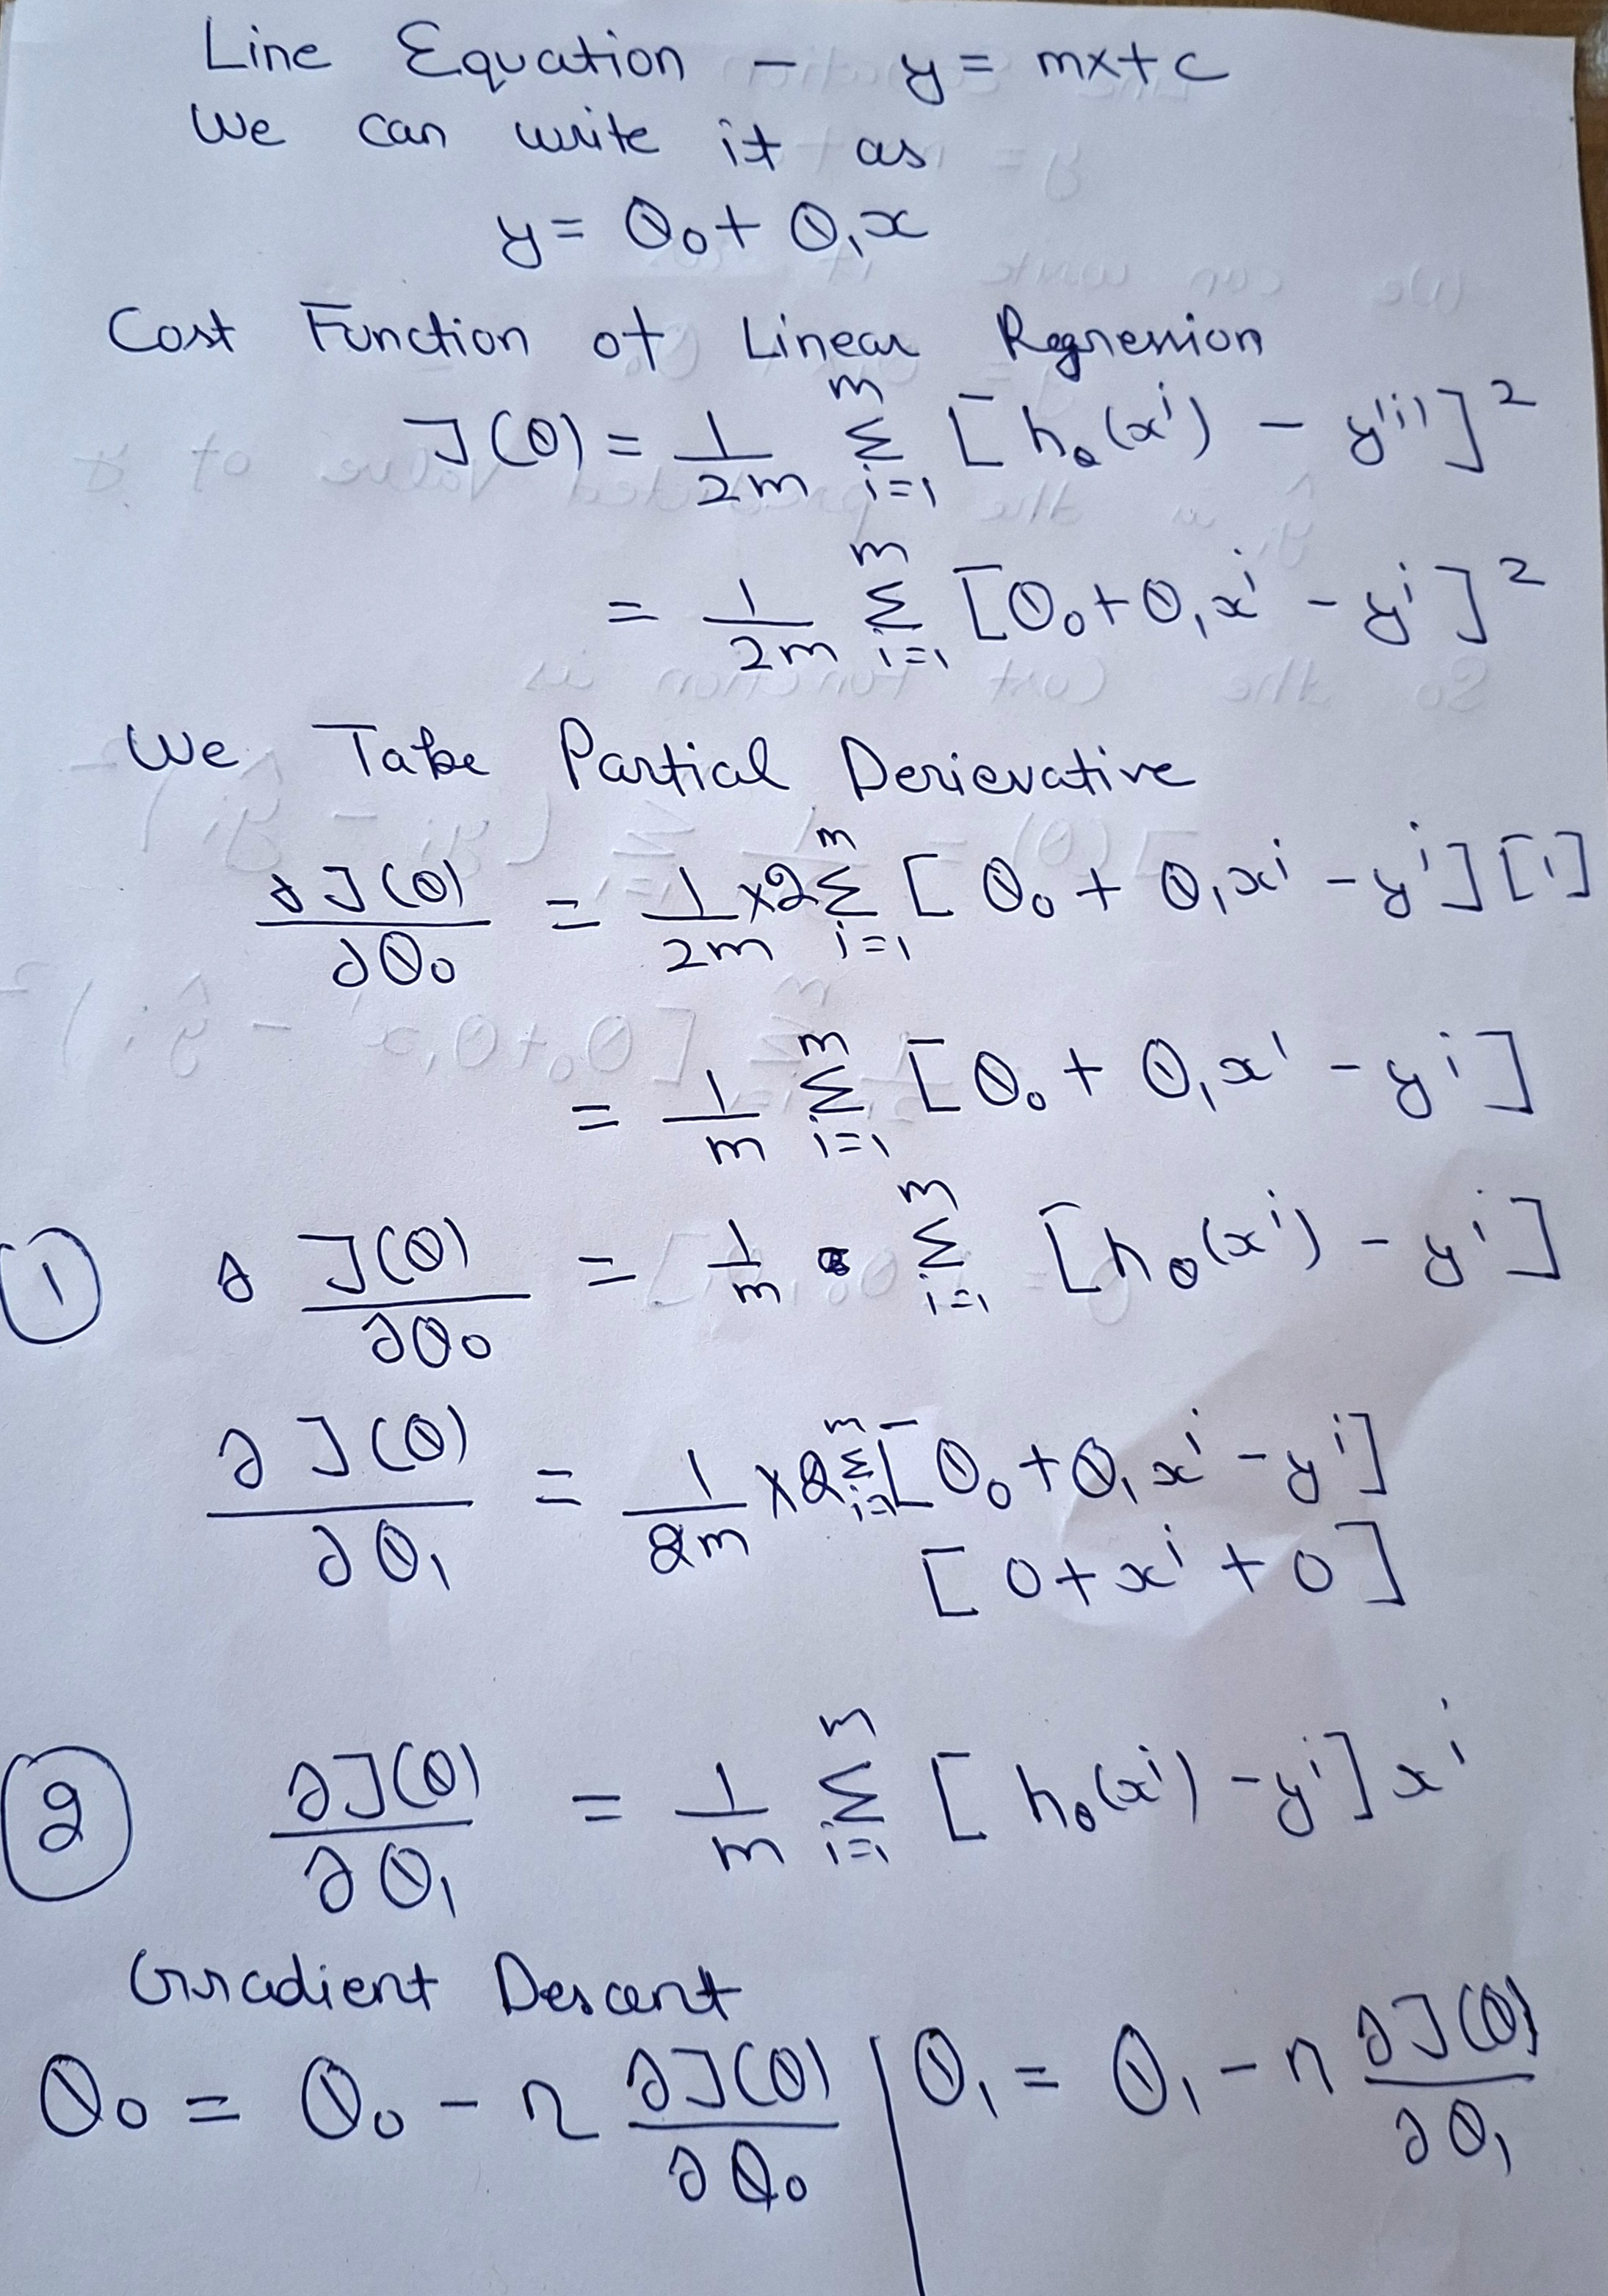

We take **partial derivatives** of the loss (cost) function because:

---

## **1. Multiple parameters to optimize**

In linear regression, the model has more than one parameter:

* $w_0$ (intercept)
* $w_1, w_2, \dots, w_n$ (slopes for each feature)

The cost function:

$$
J(w_0, w_1, \dots, w_n)
$$

is a function of **all these parameters at once**.

To find the direction to move **each parameter** in order to reduce the cost, we need to know how the cost changes when we change **just that one parameter**, keeping the others fixed.

That’s exactly what a **partial derivative** measures.

---

## **2. Gradient descent needs per-parameter updates**

Gradient descent updates parameters using:

$$
w_j := w_j - \alpha \cdot \frac{\partial J}{\partial w_j}
$$

The $\frac{\partial J}{\partial w_j}$ term tells us:

* **Sign** → whether to increase or decrease $w_j$
* **Magnitude** → how big the change should be (proportional to the slope)

Without partial derivatives, we wouldn’t know how each parameter individually affects the cost.

---

## **3. Analogy: Finding the lowest point in a landscape**

Imagine the cost function as a **hilly landscape** in many dimensions — one axis per parameter.

* Partial derivative with respect to $w_0$ = slope in the $w_0$ direction
* Partial derivative with respect to $w_1$ = slope in the $w_1$ direction
  We follow the opposite direction of these slopes to roll downhill toward the minimum.

---

## **4. Why not total derivative?**

* A total derivative is for functions with **one variable**.
* Our cost function depends on **many variables** (all $w_j$), so we use **partial derivatives** to compute the slope with respect to each one separately.

---



